# Fake News Corpus

### Import Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subsample
%matplotlib inline

### Create subset of data

In [46]:
import pandas as pd
import random
p = 0.025  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         "data/news_cleaned_2018_02_13.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
    
FNC_subset.to_csv('data/FNC_Subset.csv'))





/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
FNC_subset = pd.read_csv('data/FNC_Subset.csv')


In [37]:
#df.to_csv('data/FNC_Subset.csv')
FNC_subset.head()

,Unnamed: 0,Unnamed: 0.1,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,len_content,len_title
0,0,1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN,56,2
1,1,50,60,barenakedislam.com,hate,http://barenakedislam.com/2018/01/06/off-topic...,We appreciate your help! Click here to donate\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,OFF TOPIC: Topless ‘feminist’ goes all ‘nuclea...,"Don Spilman, Mike S Goodmann, Cleavis Nowell, ...",NaN,[''],NaN,NaN,NaN,NaN,85,15
2,2,114,138,coed.com,fake,https://coed.com/2018/01/23/boston-celtics-vs-...,VIEW GALLERY\n\nThe Boston Celtics are traveli...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Celtics vs. Lakers Live Stream: Watch Online,"Who Is Jesse Tully, A Hard Working, Diligent, ...",NaN,"['', 'Sports', 'Boston Celtics', 'los angeles ...",The Celtics will be traveling to the Staples C...,"los angeles lakers, NBA, Videos, Boston Celtics",NaN,NaN,694,7
3,3,150,176,beforeitsnews.com,fake,http://beforeitsnews.com/prophecy/2018/01/the-...,The Truth About the Israel-Palestine Conflict\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,The Truth About the Israel-Palestine Conflict,Tng Christians,NaN,[''],NaN,NaN,NaN,NaN,2663,6
4,4,234,273,barenakedislam.com,hate,http://barenakedislam.com/2018/01/20/is-your-l...,"Surely, if you live in the capitals of Sweden ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is your lovely Western country being turned in...,"Don Spilman, Richard S., Cleavis Nowell, Gene ...",NaN,[''],NaN,NaN,NaN,NaN,73,22


In [18]:

FNC_subset['len_content']=FNC_subset['content'].map(lambda x:len(x.split(' ')))
FNC_subset['len_title']= FNC_subset['title'].map(lambda x: len(str(x).split(' ')))

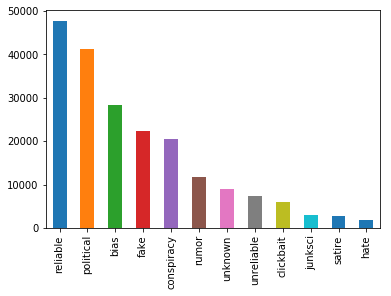

In [19]:
FNC_subset['type'].value_counts().plot(kind='bar')

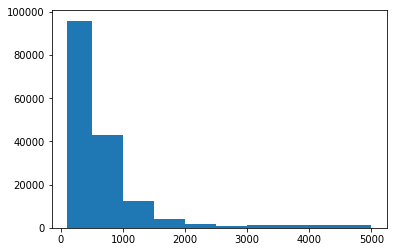

In [34]:
bin_edges = [100,500,1000,1500,2000,2500,3000,5000]

_ = plt.hist(FNC_subset['len_content'], bins =bin_edges)

plt.show()


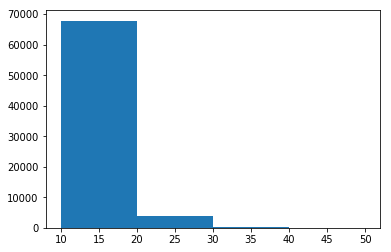

In [36]:
bin_edges = [10,20,30,40,50]

_ = plt.hist(FNC_subset['len_title'], bins=bin_edges)

### Create Fake news subset


In [59]:
# Fake News Examples
fake_bolean = FNC_subset['type'] == 'fake'
fake_articles = FNC_subset[fake_bolean]
print('Fake News Articles: ', len(fake_articles))

Fake News Articles:  22281


### View Fake News Article

In [60]:
# Fake News individual article print
# rows used: 0, 11, 49, 16621, 16683, 18034, 33194, 45839
row = 35000
used_domains = ['beforeitsnews.com', 'conservativefighters.com', 'coed.com', 'thecommonsenseshow.com', 'newswithviews.com', \
               'americannews.com', 'vigilantcitizen.com', 'therightscoop.com', 'gopthedailydose.com', 'teaparty.org']
try:
    while fake_articles.iloc[row,2] in used_domains and row < len(fake_articles):
        row +=1
except:
    pass
if row < len(fake_articles):
    print("row:",row)
    print("Website:", fake_articles.iloc[row,2])
    print("URL: ", fake_articles.iloc[row,4])                                                                                                                                                                                
    print("Headline:", fake_articles.iloc[row,9])
    print("Author:", fake_articles.iloc[row,10])
    print(fake_articles.iloc[row,5])
else:
    print('Last article reached', row)
    print('Total number articles:', len(fake_articles))

Last article reached 35000
Total number articles: 22281


### Create Satire Subset

In [61]:
# Satire Examples
satire_bolean = FNC_subset['type'] == 'satire'
satire_articles = FNC_subset[satire_bolean]
print('Satire Articles: ', len(satire_articles))

Satire Articles:  2863


### View Satire Articles

In [62]:
# Satire individual article print
# rows used: 4,8, 10 
row = 8
used_domains = ['clickhole.com', 'theshovel.com.au', 'betootaadvocate.com']
try:
    while satire_articles.iloc[row,2] in used_domains and row < len(satire_articles):
        row +=1
except:
    pass
if row < len(satire_articles):
    print("row:",row)
    print("Website:", satire_articles.iloc[row,2])
    print("URL: ", satire_articles.iloc[row,4])                                                                                                                                                                                
    print("Headline:", satire_articles.iloc[row,9])
    print("Author:", satire_articles.iloc[row,10])
    print(satire_articles.iloc[row,5])
else:
    print('Last article reached', row)
    print('Total number articles:', len(satire_articles))

row: 8
Website: 32675
URL:  satire
Headline: 2018-02-02 01:19:41.756664
Author: Whoreouse
https://aceflashman.wordpress.com/tag/whoreouse/


### Create Extreme Bias Subset

In [63]:
# Extreme Bias Examples
bias_bolean = FNC_subset['type'] == 'bias'
bias_articles = FNC_subset[bias_bolean]
print('Extreme Bias Articles: ', len(bias_articles))

Extreme Bias Articles:  28332


### View Extreme Bias Articles

In [29]:
# Extreme Bias individual article print
# rows used: 0, 4, 8  
row = 0
used_domains = ['wnd.com', 'lifenews.com', 'dailysignal.com']
try:
    while bias_articles.iloc[row,2] in used_domains and row < len(bias_articles):
        row +=1
except:
    pass
if row < len(bias_articles):
    print("row:",row)
    print("Website:", bias_articles.iloc[row,2])
    print("URL: ", bias_articles.iloc[row,4])                                                                                                                                                                                
    print("Headline:", bias_articles.iloc[row,9])
    print("Author:", bias_articles.iloc[row,10])
    print(bias_articles.iloc[row,5])
else:
    print('Last article reached', row)
    print('Total number articles:', len(bias_articles))

row: 8
Website: dailysignal.com
URL:  http://dailysignal.com/2017/12/11/fewer-blacks-hispanics-go-jobless-trump/
Headline: Fewer Blacks, Hispanics Go Jobless Under Trump
Author: nan
More black and Hispanic Americans are getting jobs on President Donald Trump’s watch, the latest employment numbers show, although critics accuse him of ignoring such minority populations.

The White House, not surprisingly, is happy to tout the results.

Unemployment among blacks declined from 8 percent one year ago to 7.3 percent in November, according to the Bureau of Labor Statistics. Blacks’ labor force participation rate rose slightly over the past year, from 61.9 percent in November 2016 to 62.2 percent last month.

Unemployment among Hispanics fell by a percentage point, from 5.7 percent to 4.7 percent, over the year. Hispanics’ labor force participation rate held steady, dipping from 65.7 percent to 65.6 percent.

The labor force participation rate reflects the percentage of Americans working or ac

### Create Political Articles Subset

In [30]:
# Political Examples
political_bolean = FNC_subset['type'] == 'political'
political_articles = FNC_subset[political_bolean]
print('Political Articles: ', len(political_articles))

Political Articles:  65759


### View Political Articles

In [33]:
# Political individual article print
# rows used: 0, 29 
row = 0
used_domains = ['baptistnews.com', 'nationalreview.com', 'dailycaller.com']
try:
    while political_articles.iloc[row,2] in used_domains and row < len(political_articles):
        row +=1
except:
    pass
if row < len(political_articles):
    print("row:",row)
    print("Website:", political_articles.iloc[row,2])
    print("URL: ", political_articles.iloc[row,4])                                                                                                                                                                                
    print("Headline:", political_articles.iloc[row,9])
    print("Author:", political_articles.iloc[row,10])
    print(political_articles.iloc[row,5])
else:
    print('Last article reached', row)
    print('Total number articles:', len(political_articles))

row: 30
Website: dailycaller.com
URL:  http://dailycaller.com/2018/01/09/googles-new-fact-check-feature-almost-exclusively-targets-conservative-sites/
Headline: Google’s New Fact-Check Feature Almost Exclusively Targets Conservative Sites
Author: Tech, Law Reporter
Google, the most powerful search engine in the world, is now displaying fact checks for conservative publications in its results.

No prominent liberal site receives the same treatment.

And not only is Google’s fact-checking highly partisan — perhaps reflecting the sentiments of its leaders — it is also blatantly wrong, asserting sites made “claims” they demonstrably never made.

When searching for a media outlet that leans right, like The Daily Caller (TheDC), Google gives users details on the sidebar, including what topics the site typically writes about, as well as a section titled “Reviewed Claims.”

Vox, and other left-wing outlets and blogs like Gizmodo, are not given the same fact-check treatment. When searching thei

### Create Credible Articles Subset

In [12]:
# Credible Examples
credible_bolean = FNC_subset['type'] == 'reliable'
credible_articles = FNC_subset[credible_bolean]
print('Credible Articles: ', len(credible_articles))

Credible Articles:  202


### View Credible Artciles

In [19]:
# Credible individual article print
# rows used: 2, 3, 202 
row = 3
used_domains = [] #['christianpost.com', 'consortiumnews.com']
try:
    while credible_articles.iloc[row,2] in used_domains and row < len(credible_articles):
        row +=1
except:
    pass
if row < len(credible_articles):
    print("row:",row)
    print("Website:", credible_articles.iloc[row,2])
    print("URL: ", credible_articles.iloc[row,4])                                                                                                                                                                                
    print("Headline:", credible_articles.iloc[row,9])
    print("Author:", credible_articles.iloc[row,10])
    print(credible_articles.iloc[row,5])
else:
    print('Last article reached', row)
    print('Total number articles:', len(credible_articles))

row: 3
Website: christianpost.com
URL:  https://www.christianpost.com/news/facebook-bans-paid-ads-pro-life-film-produced-by-mlk-niece-214143/
Headline: Facebook Lifts Ban on Paid Ads for Pro-Life Film Produced by MLK's Niece After Appeal
Author: nan
(Photo: Reuters/Dado Ruvic) Facebook.

UPDATE 11:40 a.m. ET Jan. 18: Facebook said Thursday that it has lifted its ban on paid ads for a fundraising effort connected to Alveda King's upcoming documentary that highlights the "real untold story" of abortion in the United States and the history of eugenics associated with Planned Parenthood.

In an emailed statement to The Christian Post, Facebook said the pro-life ad was originally disapproved in error and was correctly approved upon appeal. At this time, all ads connected to the "Roe v. Wade" movie page are running.

Facebook also said that abilities of all the administrators for the page will be fully restored after being temporarily blocked for so-called "spam behavior."

Original report:
